<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [5]:
student_number = 401109477
full_name = 'Sadegh Mohammadian'
assert student_number and full_name is not None, 'please input your information'

In [6]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [7]:
df = pd.read_csv('dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [8]:
print(df.info())
print(25*'=')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: CUST_ID, it doesn't any meaningful relation.

In [9]:
# Exclude irr۲elevant feature
df = df.drop(columns=['CUST_ID'])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer:

we can mean or median but i choosed median because it minimally impacts the overall data distribution and is less sensitive to outliers than the mean.

In [10]:
#Fill missing data
print(df.isnull().sum())
print(40*"=")
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
print(df.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PUR

<ipython-input-10-87d28dfe6d9f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-10-87d28dfe6d9f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

plot the correlation matrix and identify redundant features.remove them from the dataframe.

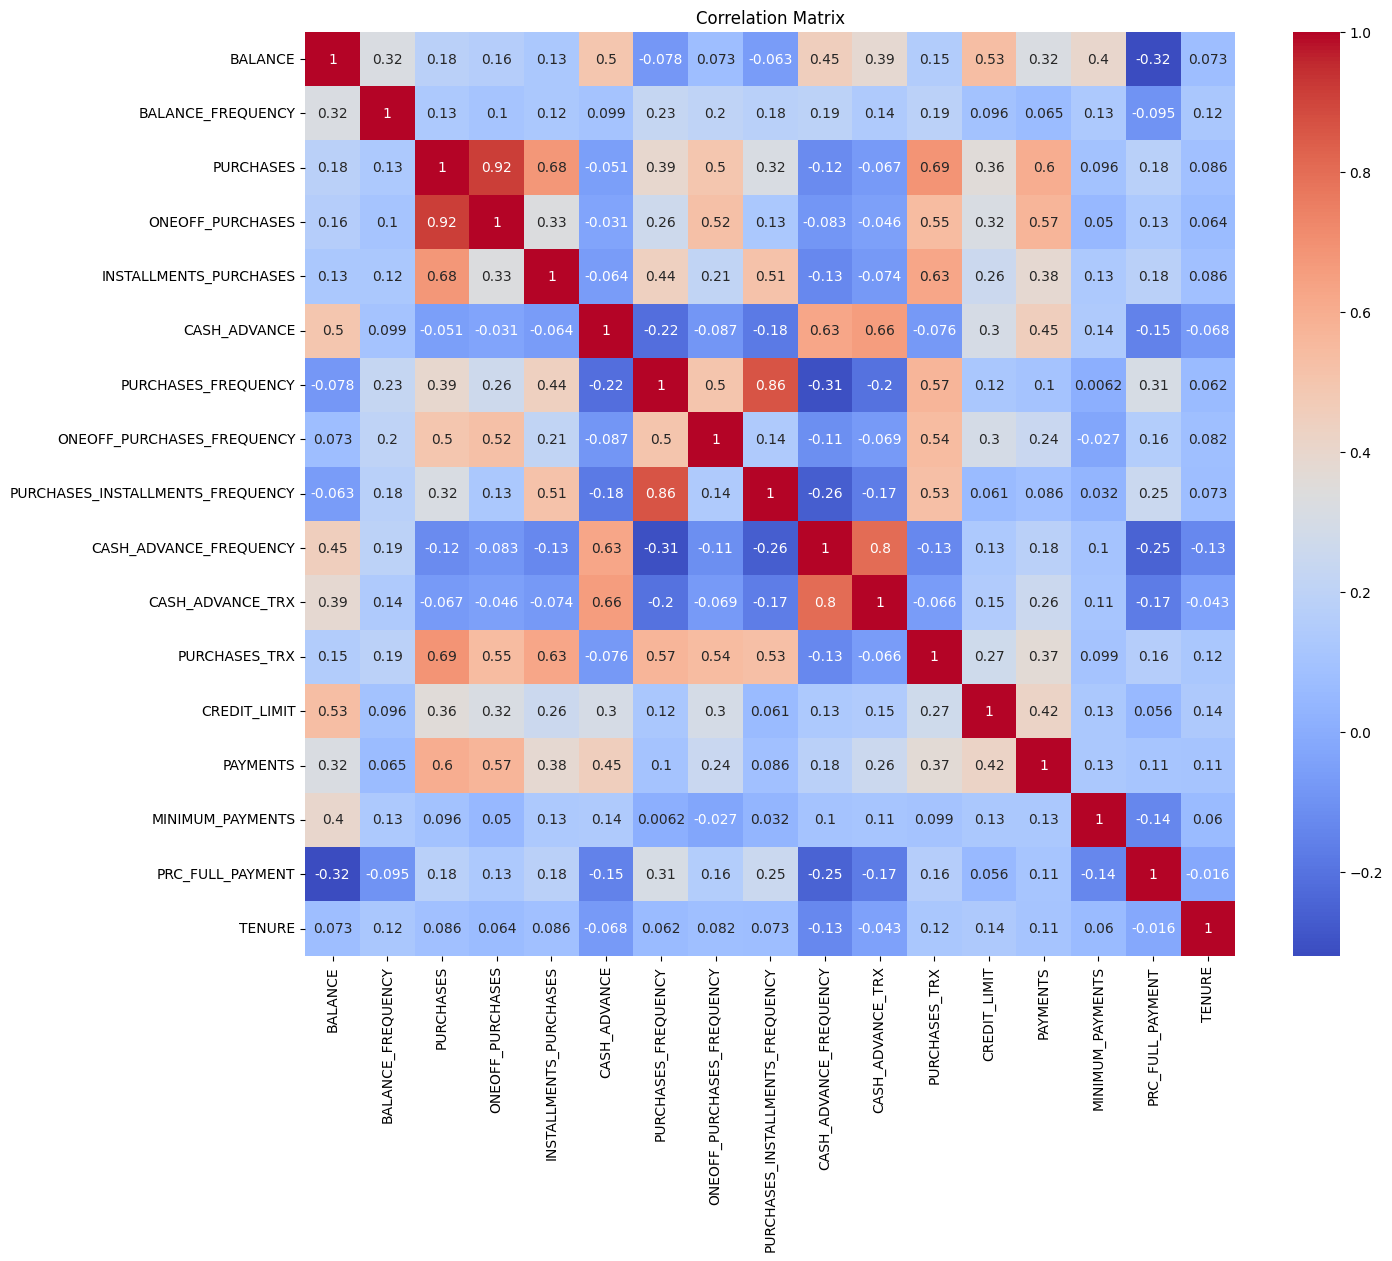

In [11]:
# Plot the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=correlation_matrix.min().min(), vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [12]:
correlation_matrix_abs = df.corr().abs()
threshold = 0.8
to_drop = set()

for i in range(len(correlation_matrix_abs.columns)):
    for j in range(i + 1, len(correlation_matrix_abs.columns)):
        if correlation_matrix_abs.iloc[i, j] > threshold:
            to_drop.add(correlation_matrix_abs.columns[j])

df_reduced = df.drop(columns=to_drop)
print(f"Removed redundant features: {to_drop}")

Removed redundant features: {'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES'}


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [13]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_reduced)

Why is it important to standardize the data before applying PCA?
<br>
Answer:

tandardizing the data before applying Principal Component Analysis (PCA) is crucial because PCA is sensitive to the scale of the variables.PCA identifies directions (principal components) that capture the maximum variance in the data.

If variables have different scales, PCA will be biased towards the variable with the larger scale since it contributes more to the total variance.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:
StandardScaler standardizes features by removing the mean and scaling to unit variance.

Normalizer scales each sample (rather than each feature) to have a unit norm (either L1 or L2 norm).

For PCA, StandardScaler is a better choice.because:
1. PCA aims to maximize variance along the principal components. If the features are not on the same scale, PCA can become biased towards features with larger scales, leading to distorted components. StandardScaler ensures that each feature contributes equally by setting mean to 0 and variance to 1.
2. PCA focuses on variances across features, not samples. Since StandardScaler standardizes features rather than individual samples, it aligns well with PCA’s needs.


## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [15]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        # Step 1: Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Perform eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components if specified
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]

        self.components = eigenvectors
        self.explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Step 1: Center the data
        X_centered = X - self.mean

        # Step 2: Project the data onto the principal components
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components


### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:6

['25.4', '47.7', '56.4', '63.9', '70.5', '76.1', '81.4', '85.7', '89.5', '92.6', '94.6', '96.3', '97.8', '99.0', '100.0']
6


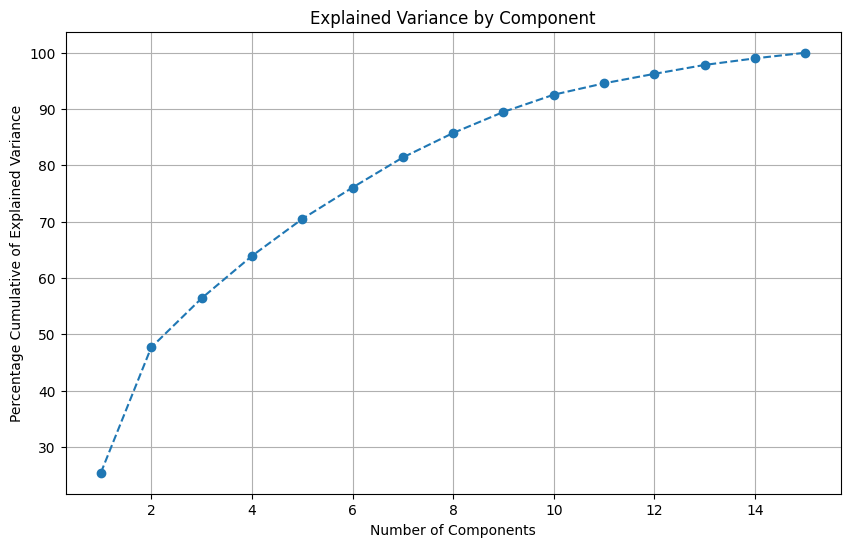

In [27]:
# todo
model = CustomPCA()
model.fit(df_standardized)
cumulative_variance = np.cumsum(model.get_explained_variance_ratio()) * 100
print([f"{i:.1f}" for i in cumulative_variance])
n_components = np.argmax([cumulative_variance >= 75]) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Percentage Cumulative of Explained Variance')
plt.title('Explained Variance by Component')
plt.grid(True)
plt.show()


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [41]:
#Build a new DataFrame with the first slected components
custom_pca = CustomPCA(n_components=n_components)
custom_pca.fit(df_standardized)
X_pca = custom_pca.transform(df_standardized)

pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

pca_df.to_csv('pca_output.csv', index=False)
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0  1.731242  0.824084 -0.384320 -0.451623 -0.087766  0.438057
1  0.301398 -2.533638  0.621582 -0.939313 -0.794456  0.060615
2 -1.194199  0.887568 -1.184455  1.129115 -1.152626 -1.869029
3  0.930140  0.030106 -0.111213 -1.309452 -0.505452 -0.834667
4  1.499511  0.517780 -0.794300 -0.125376 -0.253049  0.326998


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

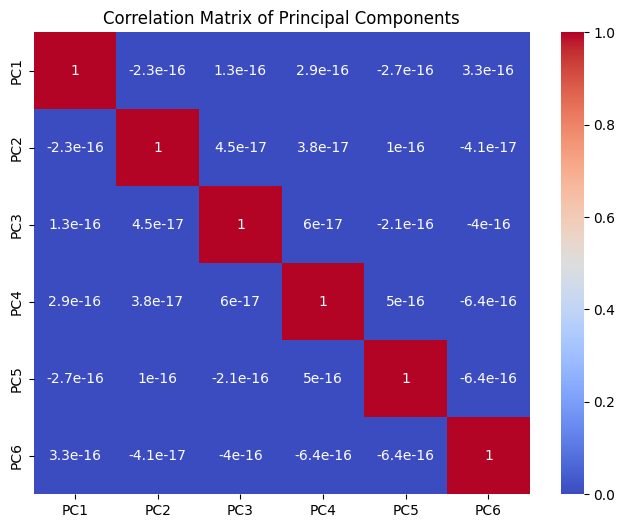

In [42]:
# todo
correlation_matrix = pca_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=correlation_matrix.min().min(), vmax=1)
plt.title('Correlation Matrix of Principal Components')
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [43]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iter):
            self.labels_ = self._assign_clusters(X)
            new_centroids = self._calculate_centroids(X)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
        self.inertia_ = self._calculate_inertia(X)
        return self

    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.
        Returns: labels (array-like, shape [n_samples])
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _calculate_centroids(self, X):
        """
        Calculate the centroids as the mean of points in each cluster.
        Returns: centroids (array-like, shape [n_clusters, n_features])
        """
        centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
        return centroids

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        inertia = 0.0
        for i in range(self.n_clusters):
            cluster_points = X[self.labels_ == i]
            inertia += np.sum((cluster_points - self.centroids[i]) ** 2)
        return inertia


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?
if we look at the plot we can see elbow point occurs in k=9

In [44]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

for i in range(1, 30):
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    kmeans_pca.fit(X_pca)

    WCSS.append(kmeans_pca.inertia_)


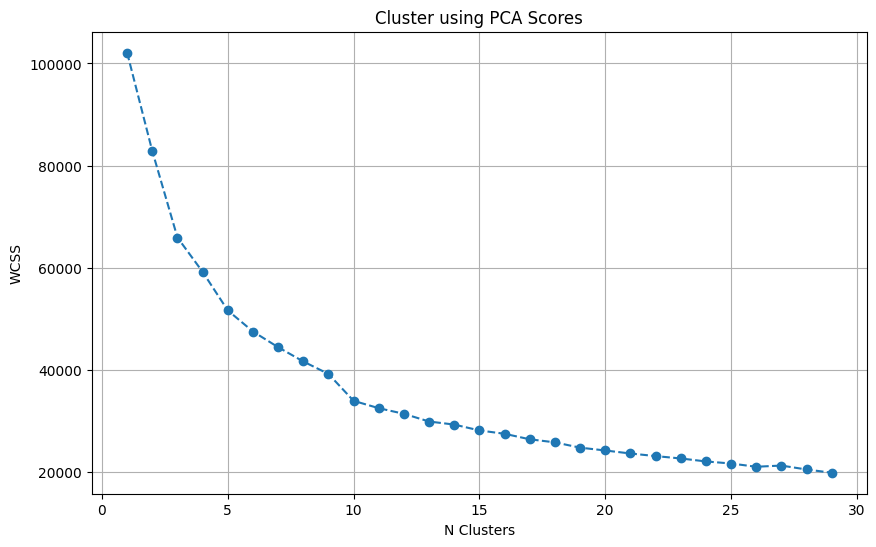

In [46]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='--')
plt.title('Cluster using PCA Scores')
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.xticks(range(0, 31, 5))
plt.grid()
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [51]:
optimal_n_clusters = 9
kmeans_optimal = CustomKMeans(n_clusters=optimal_n_clusters, random_state=42)

kmeans_optimal.fit(X_pca)

cluster_labels = kmeans_optimal.labels_
pca_df['segment'] = cluster_labels

print(pca_df.head())



        PC1       PC2       PC3       PC4       PC5       PC6  segment
0  1.731242  0.824084 -0.384320 -0.451623 -0.087766  0.438057        5
1  0.301398 -2.533638  0.621582 -0.939313 -0.794456  0.060615        1
2 -1.194199  0.887568 -1.184455  1.129115 -1.152626 -1.869029        8
3  0.930140  0.030106 -0.111213 -1.309452 -0.505452 -0.834667        5
4  1.499511  0.517780 -0.794300 -0.125376 -0.253049  0.326998        5


In [52]:
pca_df['segment'] = cluster_labels
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6  segment
0  1.731242  0.824084 -0.384320 -0.451623 -0.087766  0.438057        5
1  0.301398 -2.533638  0.621582 -0.939313 -0.794456  0.060615        1
2 -1.194199  0.887568 -1.184455  1.129115 -1.152626 -1.869029        8
3  0.930140  0.030106 -0.111213 -1.309452 -0.505452 -0.834667        5
4  1.499511  0.517780 -0.794300 -0.125376 -0.253049  0.326998        5


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

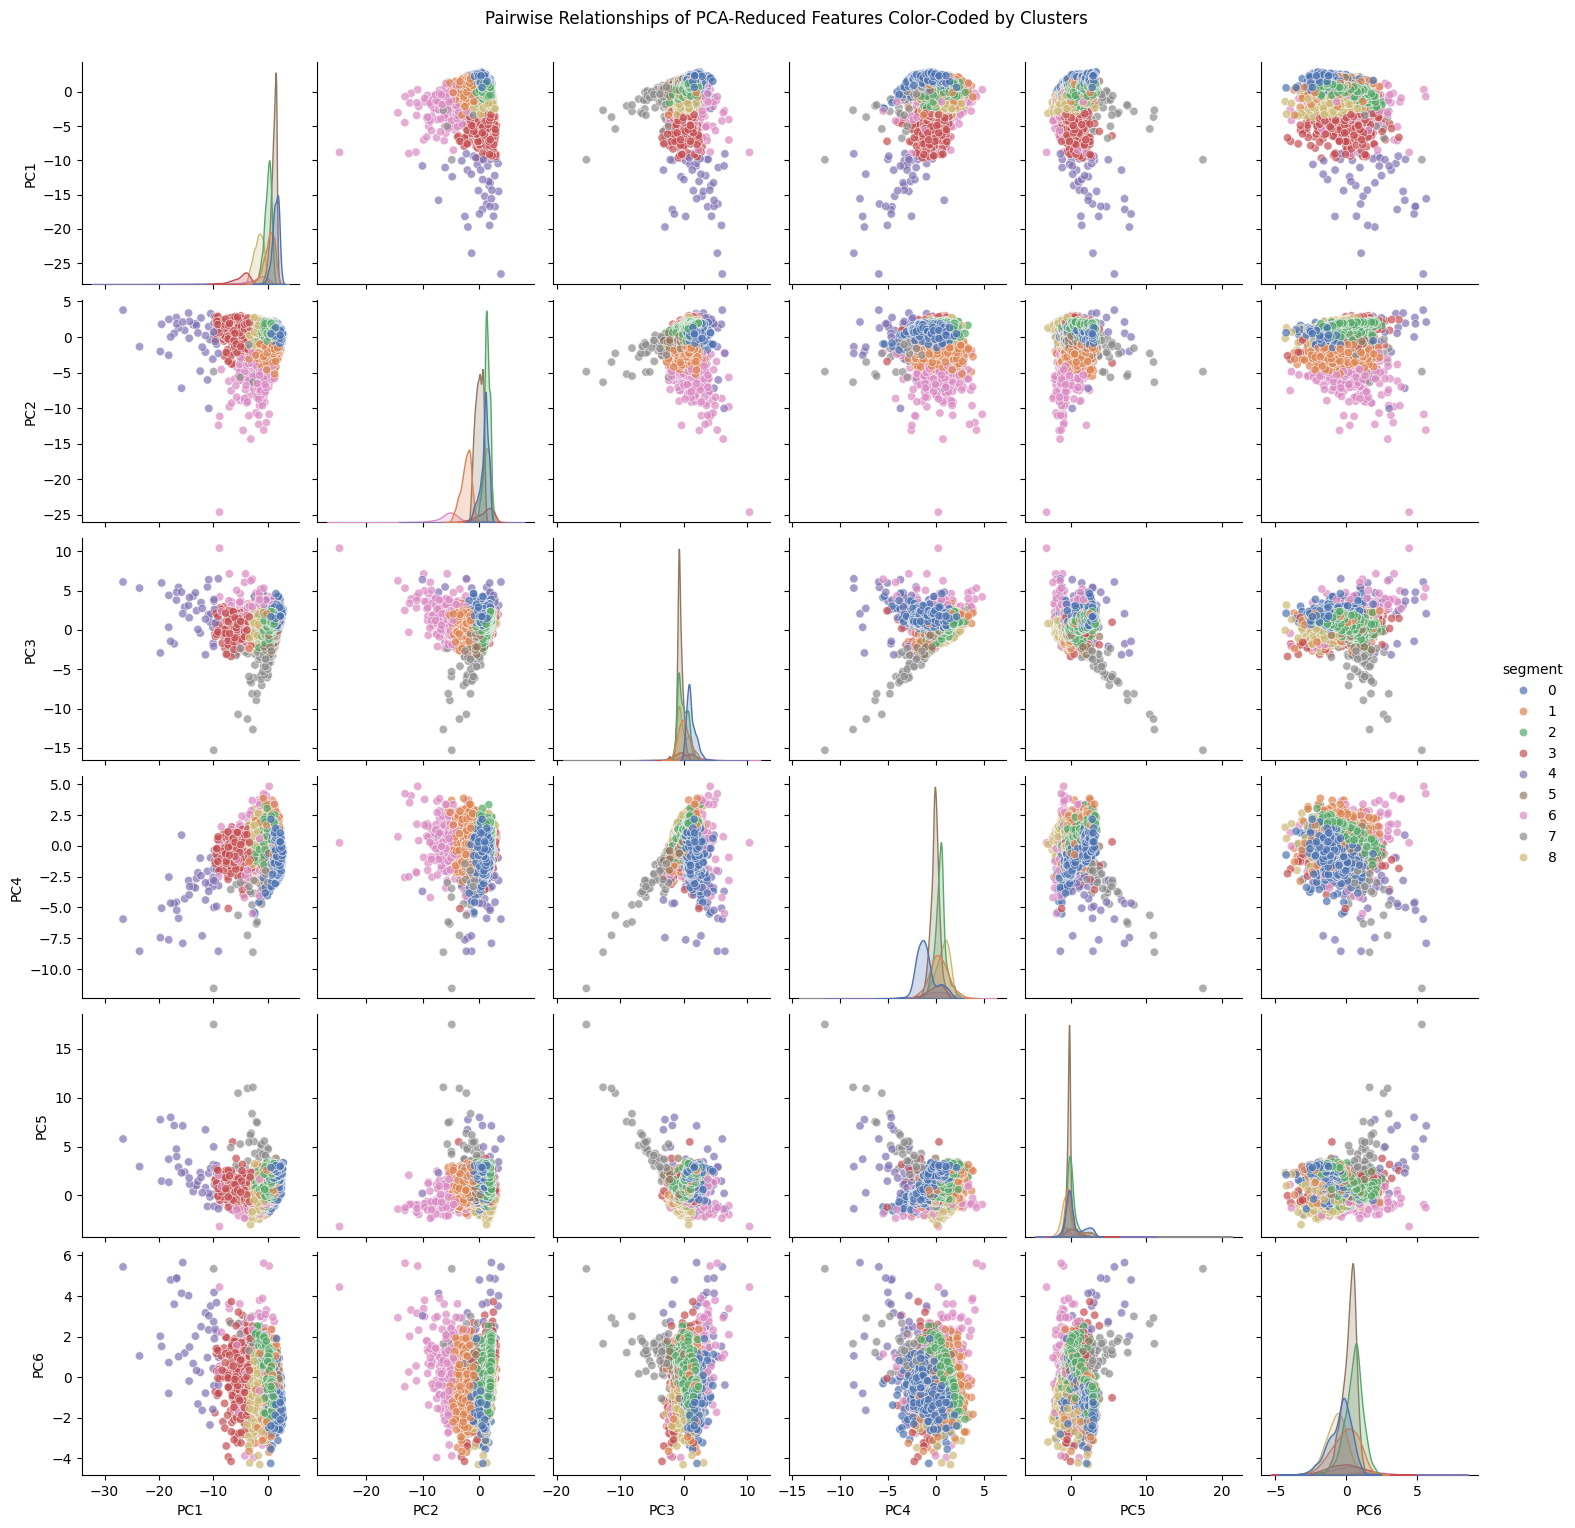

In [56]:

sns.pairplot(pca_df, hue='segment', palette='deep', diag_kind='kde', markers='o', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships of PCA-Reduced Features Color-Coded by Clusters', y=1.02)
plt.show()


So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


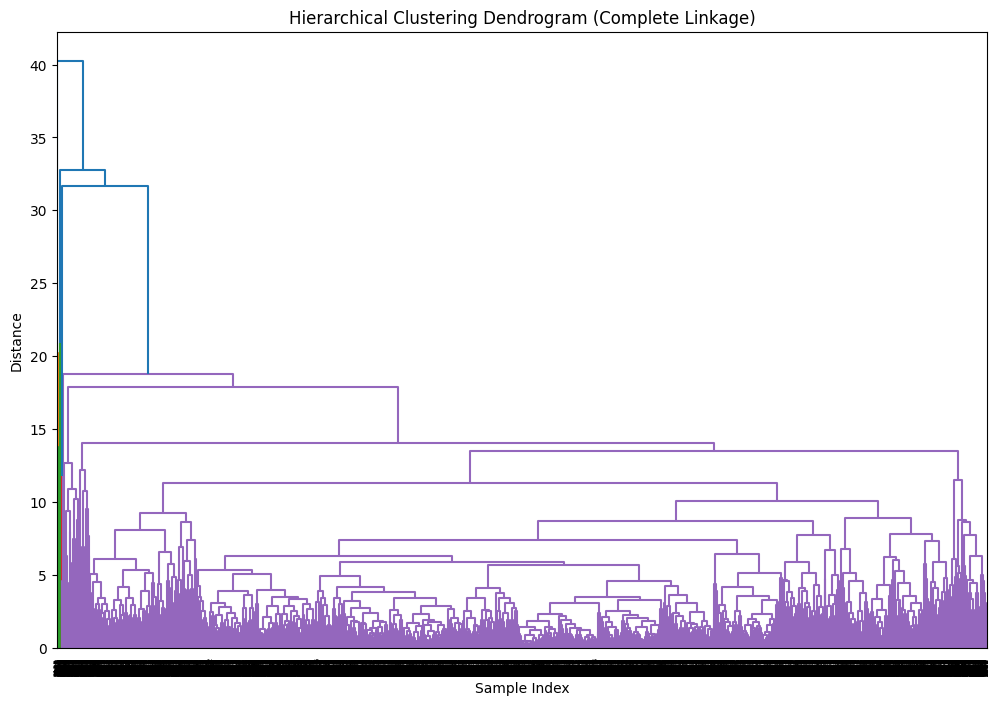

In [55]:
# Perform Hierarchical Clustering on the pca dataset
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_pca, method='complete')

plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

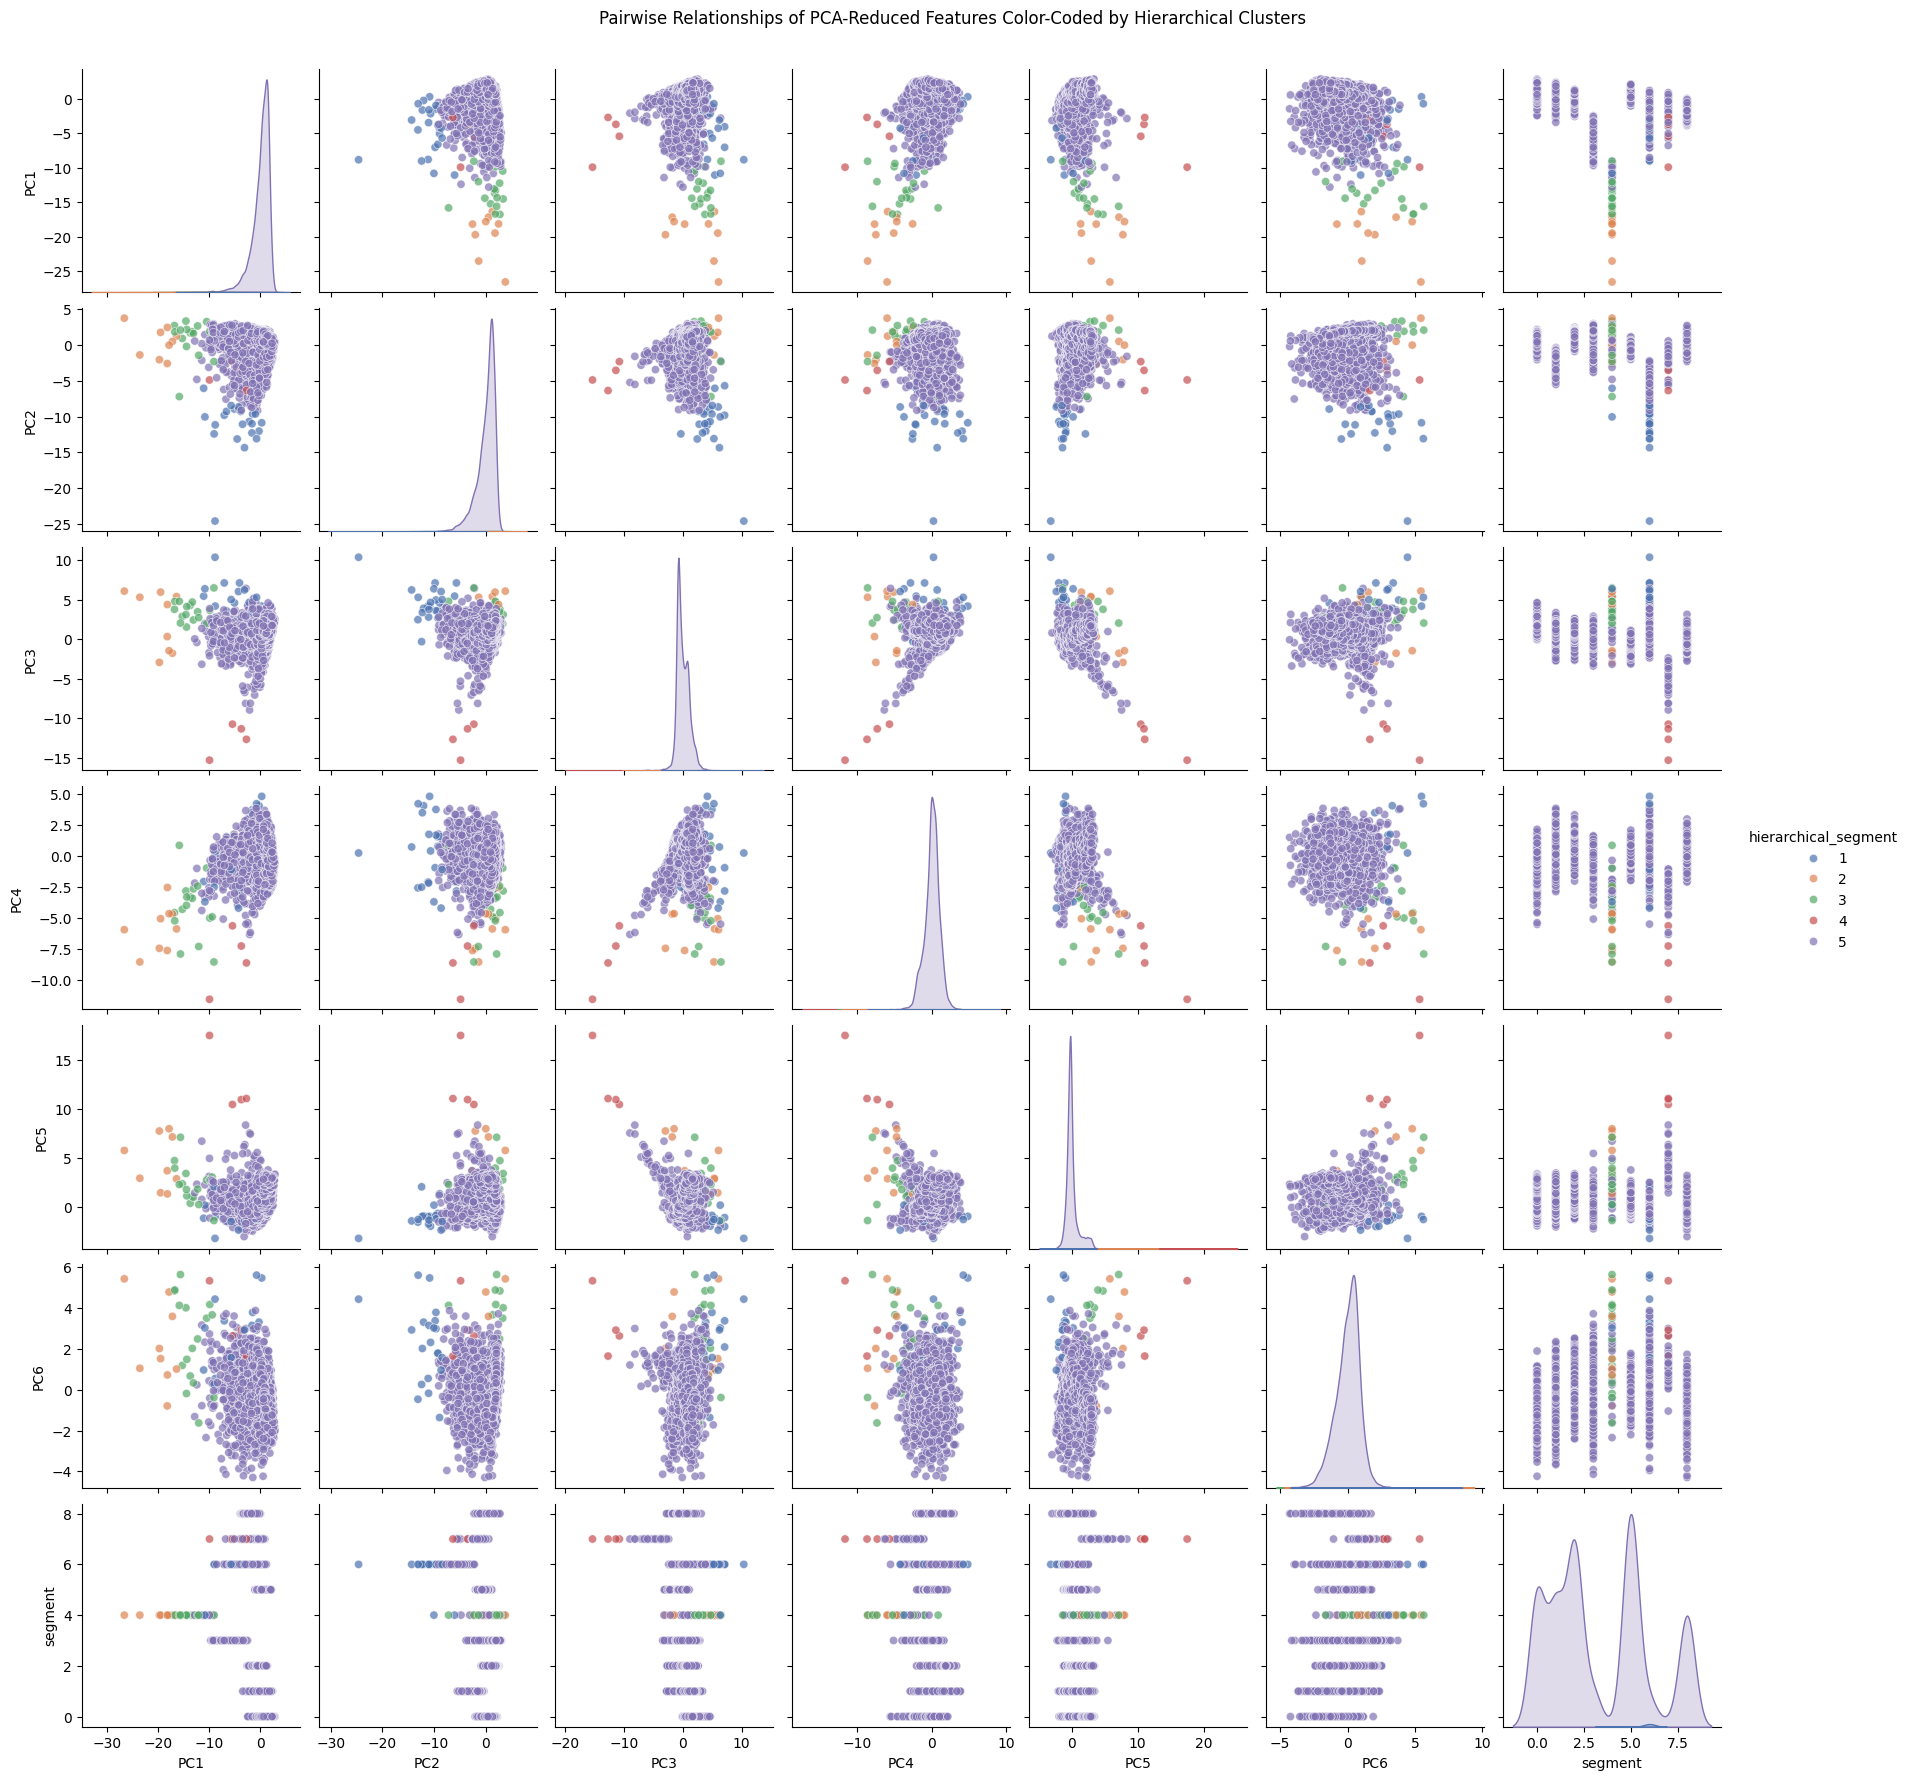

In [59]:
from scipy.cluster.hierarchy import fcluster
number_cluster = 5
clusters = fcluster(Z, number_cluster, criterion='maxclust')
pca_df['hierarchical_segment'] = clusters

sns.pairplot(pca_df, hue='hierarchical_segment', palette='deep', diag_kind='kde', markers='o', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships of PCA-Reduced Features Color-Coded by Hierarchical Clusters', y=1.02)
plt.show()
